In [3]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages:Annotated[list,add_messages]

In [6]:
graph_builder = StateGraph(State)
graph_builder


In [9]:
import os
from dotenv import load_dotenv
load_dotenv()

False

In [23]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model
llm = ChatGroq(model="openai/gpt-oss-120b")

In [24]:
## Node Functionality
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [25]:

graph_builder=StateGraph(State)

## Adding node
graph_builder.add_node("llmchatbot",chatbot)
## Adding Edges
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

## compile the graph
graph=graph_builder.compile()

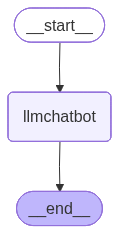

In [26]:
## Visualize the graph
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [27]:
response=graph.invoke({"messages":"Hi"})

In [37]:
response['messages'][1].content

'Hello! How can I help you today?'

In [38]:
response

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='fb6f0f3e-7ffa-48f6-9dba-9bdf139a0714'),
  AIMessage(content='Hello! How can I help you today?', additional_kwargs={'reasoning_content': 'User says "Hi". Need to respond. Should be friendly.'}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 72, 'total_tokens': 104, 'completion_time': 0.066539219, 'completion_tokens_details': {'reasoning_tokens': 14}, 'prompt_time': 0.003213072, 'prompt_tokens_details': None, 'queue_time': 0.049398268, 'total_time': 0.069752291}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_df42644058', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b1de4-dc68-7ce2-8925-f21747f19cc7-0', usage_metadata={'input_tokens': 72, 'output_tokens': 32, 'total_tokens': 104, 'output_token_details': {'reasoning': 14}})]}

In [42]:
response=graph.invoke({"messages":"how are u doing"})
response

{'messages': [HumanMessage(content='how are u doing', additional_kwargs={}, response_metadata={}, id='e6437df0-8afe-46ac-8e09-69b7a373892b'),
  AIMessage(content="I'm doing great, thanks for asking! How can I help you today?", additional_kwargs={'reasoning_content': 'The user asks "how are u doing". It\'s a casual greeting. We respond politely. No policy issues.'}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 75, 'total_tokens': 122, 'completion_time': 0.13339035, 'completion_tokens_details': {'reasoning_tokens': 23}, 'prompt_time': 0.002793534, 'prompt_tokens_details': None, 'queue_time': 0.052803375, 'total_time': 0.136183884}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_e88ce9c728', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b1df1-8903-7b02-bdcb-b1dcf522d0e5-0', usage_metadata={'input_tokens': 75, 'output_tokens': 47, 'total_tokens': 122, 'output_token_details': 

In [40]:
response["messages"]

[HumanMessage(content='how are u doing', additional_kwargs={}, response_metadata={}, id='6959e24f-8307-4d7a-981b-ee31a86cfe73'),
 AIMessage(content="I'm doing great, thanks for asking! How about you? Anything I can help you with today?", additional_kwargs={'reasoning_content': 'The user says "how are u doing". This is a casual greeting. We should respond politely, ask how they are, maybe ask if they need help. No policy issues. Use friendly tone.'}, response_metadata={'token_usage': {'completion_tokens': 70, 'prompt_tokens': 75, 'total_tokens': 145, 'completion_time': 0.149833115, 'completion_tokens_details': {'reasoning_tokens': 41}, 'prompt_time': 0.002757494, 'prompt_tokens_details': None, 'queue_time': 0.053594725, 'total_time': 0.152590609}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_e88ce9c728', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b1dee-3125-7531-9433-1ce26b91b255-0', usage_metadata=

In [47]:
for event in graph.stream({"messages":"hi how are u"}):
    for value in event.values():
        print(value['messages'][-1].content)

Hey there! I'm doing great, thanks for asking. How can I help you today?


In [48]:
from langchain_core.messages import HumanMessage, AIMessage

In [50]:
state = {
    "messages": [
        HumanMessage(content="my name is ritika"),
        AIMessage(content="okay understood"),
        HumanMessage(content="what is my name")
    ]
}

response = graph.invoke(state)



In [52]:
response["messages"][-1].content

'Your name is **Ritika**. Let me know if there’s anything else you’d like to discuss!'